# Facial Alignment

Given two images with faces, crop the faces out, then rotate, scale and translate the image such that

- Be centered in the image.
- Be rotated that such the eyes lie on a horizontal line (i.e., the face is rotated such that the eyes lie along the same y-coordinates).
- Be scaled such that the size of the faces are approximately identical.

In [3]:
# import the necessary packages
from collections import OrderedDict
import numpy as np
import cv2
import dlib
from PIL import Image

import face_recognition

In [10]:
predictor = dlib.shape_predictor('../shape_predictor_68_face_landmarks.dat')

In [8]:
ch = 3
assert ch == 4, 'RGBA image has 4 channels.'

AssertionError: RGBA image has 4 channels.

In [2]:
from matplotlib import pyplot as plt

In [18]:
def rotate_image(image, angle):
    '''
    Rotates an image by an angle, in degrees, clockwise.
    
    :param image: an image
    :type image: numpy.ndarray
    
    :param angle: the angle to rotate the image clockwise
    :type angle: float
    
    :return result: an image, rotated by the specified angle clockwise
    :rtype result: numpy.ndarray
    '''
    
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, -angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    
    return result

def rgba2rgb( rgba, background=(255,255,255) ):
    '''
    Change a RGBA image to a RGB image
    
    :param rgba: the image, as an 3-dimsenional or 4 dimensional array
        corresponding to the 
    :type rgba: numpy.ndarray
    
    :param background: the background color for the RGB image
    :type background: tuple
    
    :return rgb_img: the RGB version of the image
    :rtype rgb_img: numpy.ndarray
    '''
    row, col, ch = rgba.shape

    if ch == 3:
        return rgba

    assert ch == 4, 'RGBA image has 4 channels.'

    rgb = np.zeros( (row, col, 3), dtype='float32' )
    r, g, b, a = rgba[:,:,0], rgba[:,:,1], rgba[:,:,2], rgba[:,:,3]

    a = np.asarray( a, dtype='float32' ) / 255.0

    R, G, B = background

    rgb[:,:,0] = r * a + (1.0 - a) * R
    rgb[:,:,1] = g * a + (1.0 - a) * G
    rgb[:,:,2] = b * a + (1.0 - a) * B
    
    rgb_img = np.asarray( rgb, dtype='uint8' )
    
    return rgb_img

def face_balancer(img):
    '''
    Given an image, rotate the image such that the eyes are parallel,
    then extract the face.
    '''

    face_locations = face_recognition.face_locations(img)
    print("I found {} face(s) in this photograph.".format(len(face_locations)))

    # plot the original image
    for face_location in face_locations:
        
        # Print the location of each face in this image
        top, right, bottom, left = face_location
        print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

        # You can access the actual face itself like this:
        face_image = img[top:bottom, left:right]
        plt.figure(figsize=(15,8))
        plt.imshow(face_image)
        plt.title('Original Image')
        plt.show()
    
    # extract the face_landmarks
    face_landmarks_list = face_recognition.face_landmarks(img)
    
    # extract (x,y) coordinates of the right eye
    x_coor_right_eye = [p[0] for p in face_landmarks_list[0]['right_eye']]
    y_coor_right_eye = [p[1] for p in face_landmarks_list[0]['right_eye']]
    
    # extract (x,y) coordinates of the left eye
    x_coor_left_eye = [p[0] for p in face_landmarks_list[0]['left_eye']]
    y_coor_left_eye = [p[1] for p in face_landmarks_list[0]['left_eye']]
    
    # calculate (x,y) coordinates of the center of left eye
    left_eye_center_x = np.mean(x_coor_left_eye)
    left_eye_center_y = np.mean(y_coor_left_eye)
    
    # calculate (x,y) coordinates of the center of right eye
    right_eye_center_x = np.mean(x_coor_right_eye)
    right_eye_center_y = np.mean(y_coor_right_eye)
    
    # calculate the midpoint of the centers of the two eyes
    eye_center_x = (left_eye_center_x + right_eye_center_x) // 2
    eye_center_y = (left_eye_center_y + right_eye_center_y) // 2
    
    plt.figure(figsize=(15,8))
    plt.title('Image with coordinates of eyes plotted')
    plt.imshow(img)

    plt.plot(x_coor_right_eye, y_coor_right_eye, color='lime', marker='.', markersize=5)
    plt.plot(x_coor_left_eye, y_coor_left_eye, color='lime', marker='.', markersize=5)
    plt.plot(left_eye_center_x, left_eye_center_y, color='red', marker='.', markersize=5)
    plt.plot(right_eye_center_x, right_eye_center_y, color='red', marker='.', markersize=5)
    plt.plot(eye_center_x, eye_center_y, color='blue', marker='.', markersize=5)
    plt.plot([left_eye_center_x, right_eye_center_x],
             [left_eye_center_y, right_eye_center_y],
             color='red')

    plt.show()
    
    dX = right_eye_center_x - left_eye_center_x
    dY = right_eye_center_y - left_eye_center_y

    rotation_angle = -np.degrees(np.arctan2(dY, dX))
    
    rotated_img = rotate_image(img, rotation_angle)
    
    plt.figure(figsize=(15,8))
    plt.title('Rotated image such that eyes are parallel to x-axis')
    plt.imshow(rotated_img)
    plt.show()
    
    return rotated_img

def align_faces(img1, img2):
    '''
    Given two images, detect face(s), extract the faces such that the face
    
    1. is centered in the image.
    2. is rotated that such the eyes lie on a horizontal line 
    (i.e., the face is rotated such that the eyes lie along the same y-coordinates).
    3. is scaled such that the size of the faces are approximately identical.
    '''
    
    
    
    return aligned_img1, aligned_img2

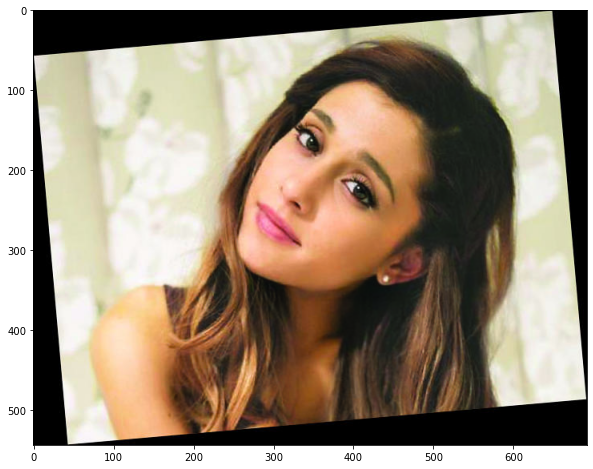

In [4]:
img1 = plt.imread('../images/ariana_grande.jpeg')
img1 = rgba2rgb(img1)

plt.figure(figsize=(15,8))
plt.imshow(img1)
plt.show()

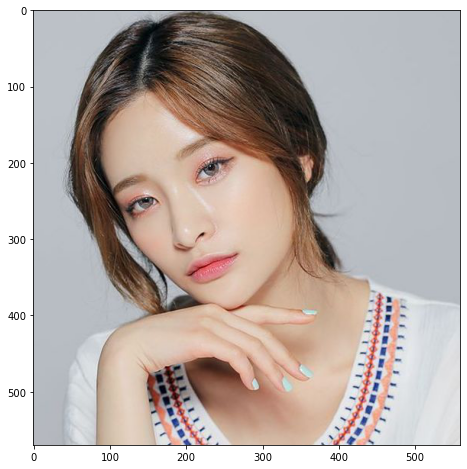

In [5]:
img2 = plt.imread('../images/korean_female_face.jpeg')
img2 = rgba2rgb(img2)

plt.figure(figsize=(15,8))
plt.imshow(img2)
plt.show()

I found 1 face(s) in this photograph.
A face is located at pixel location Top: 118, Left: 241, Bottom: 341, Right: 464


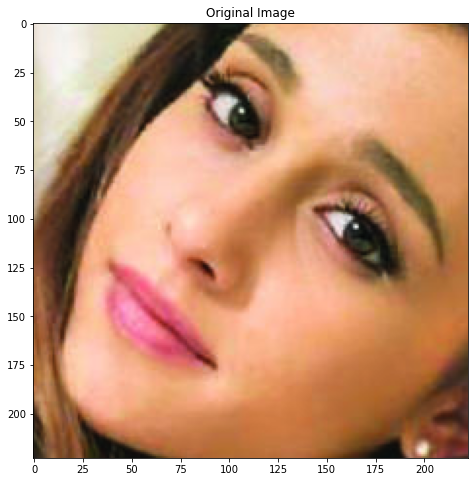

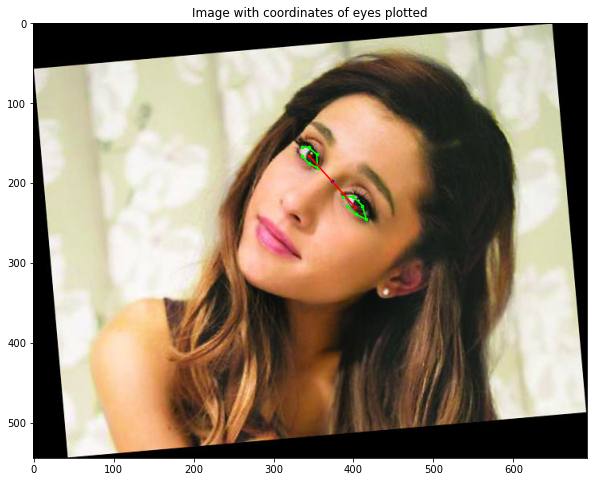

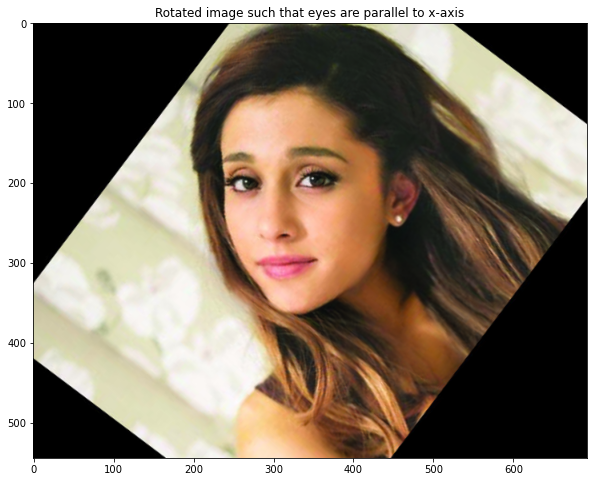

In [20]:
rotated_img1 = face_balancer(img1)

I found 1 face(s) in this photograph.
A face is located at pixel location Top: 142, Left: 191, Bottom: 365, Right: 414


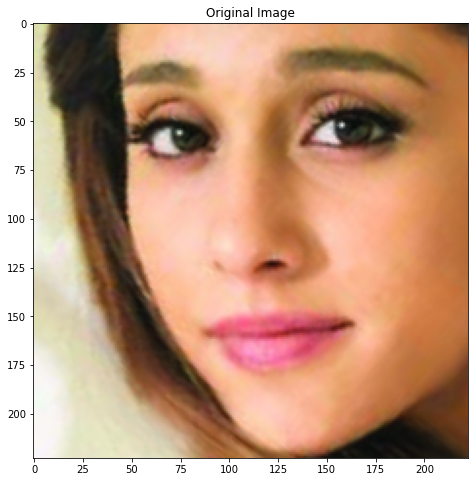

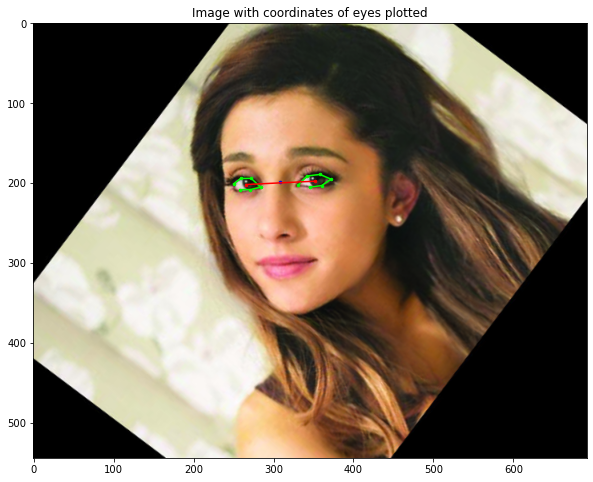

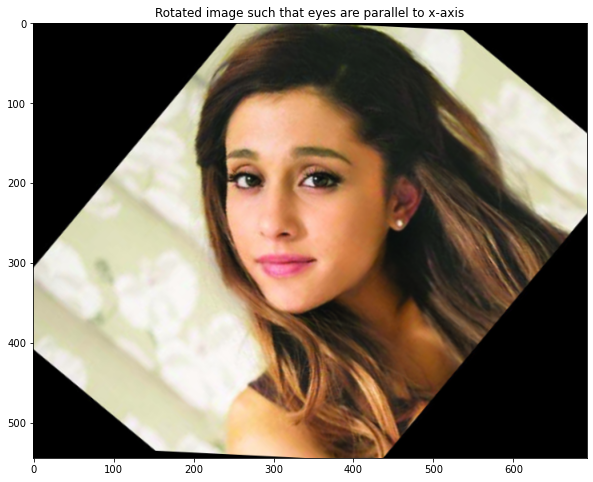

In [22]:
_ = face_balancer(rotated_img1)

I found 1 face(s) in this photograph.
A face is located at pixel location Top: 167, Left: 92, Bottom: 390, Right: 315


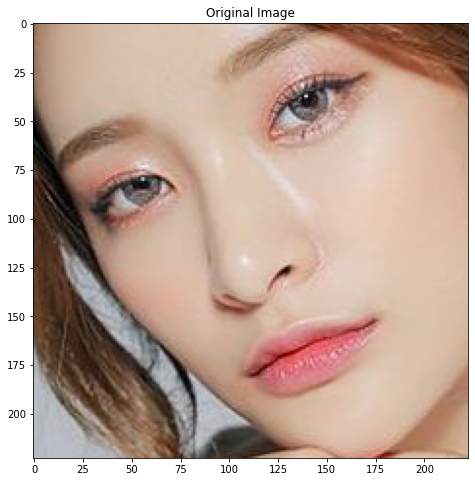

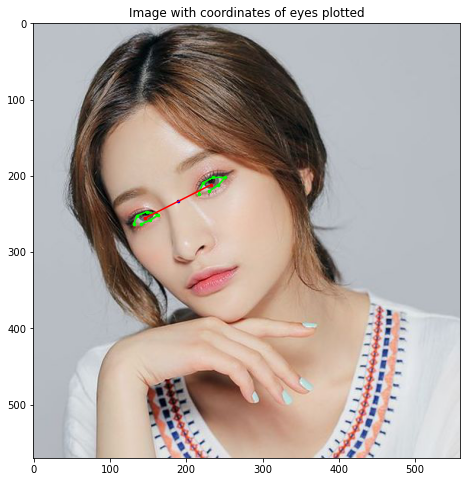

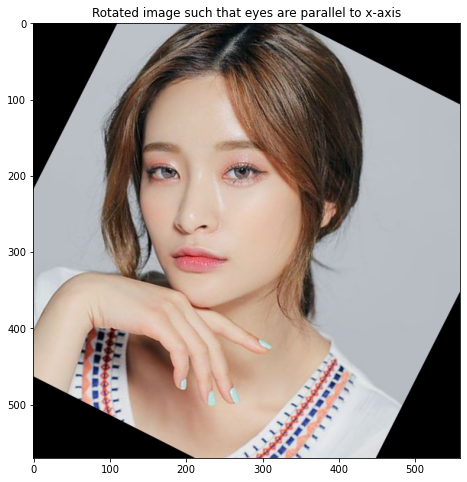

In [21]:
rotated_img2 = face_balancer(img2)

I found 1 face(s) in this photograph.
A face is located at pixel location Top: 118, Left: 117, Bottom: 341, Right: 340


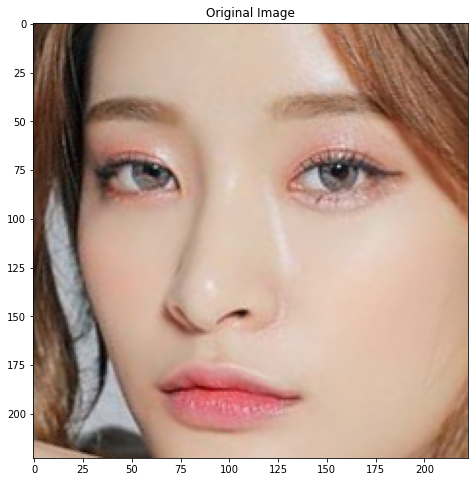

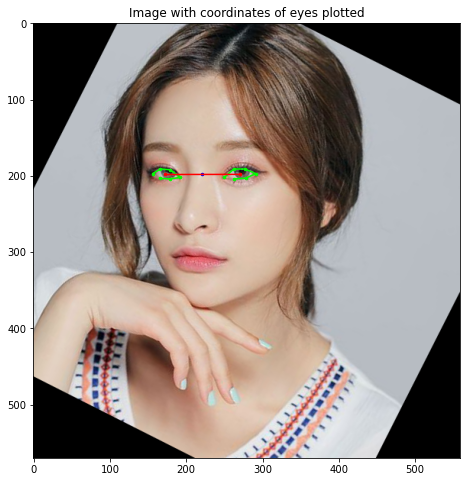

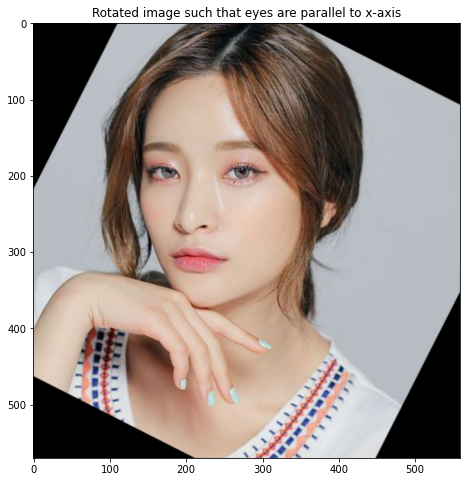

In [24]:
_ = face_balancer(rotated_img2)

In [1]:
class FaceAligner:
    def __init__(self, predictor, desiredLeftEye=(0.35, 0.35),
                 desiredFaceWidth=256, desiredFaceHeight=None):
        '''
        :param predictor:
        :type predictor:
        
        :param desiredLeftEye: An optional (x, y) tuple with the default shown, 
            specifying the desired output left eye position. 
            For this variable, it is common to see percentages within the range of 20-40%. 
            These percentages control how much of the face is visible after alignment. 
            The exact percentages used will vary on an application-to-application basis. 
            With 20% you’ll basically be getting a “zoomed in” view of the face, 
            whereas with larger values the face will appear more “zoomed out.”
        :type desiredLeftEye: tuple
        
        :param desiredFaceWidth: desired face width value in pixels.
        :type desiredFaceWidth: int
        
        :param desiredFaceHeight: desired face height value in pixels.
        :type desiredFaceHeight: int
        '''
        # store the facial landmark predictor, desired output left
        # eye position, and desired output face width + height
        self.predictor = predictor
        self.desiredLeftEye = desiredLeftEye
        self.desiredFaceWidth = desiredFaceWidth
        self.desiredFaceHeight = desiredFaceHeight

        # if the desired face height is None, set it to be the
        # desired face width (normal behavior)
        if self.desiredFaceHeight is None:
            self.desiredFaceHeight = self.desiredFaceWidth

    def align(self, image, gray, rect):
        # convert the landmark (x, y)-coordinates to a NumPy array
        shape = self.predictor(gray, rect)
        shape = shape_to_np(shape)

        #simple hack ;)
        if (len(shape)==68):
            # extract the left and right eye (x, y)-coordinates
            (lStart, lEnd) = FACIAL_LANDMARKS_68_IDXS["left_eye"]
            (rStart, rEnd) = FACIAL_LANDMARKS_68_IDXS["right_eye"]
        else:
            (lStart, lEnd) = FACIAL_LANDMARKS_5_IDXS["left_eye"]
            (rStart, rEnd) = FACIAL_LANDMARKS_5_IDXS["right_eye"]

        leftEyePts = shape[lStart:lEnd]
        rightEyePts = shape[rStart:rEnd]

        # compute the center of mass for each eye
        leftEyeCenter = leftEyePts.mean(axis=0).astype("int")
        rightEyeCenter = rightEyePts.mean(axis=0).astype("int")

        # compute the angle between the eye centroids
        dY = rightEyeCenter[1] - leftEyeCenter[1]
        dX = rightEyeCenter[0] - leftEyeCenter[0]
        angle = np.degrees(np.arctan2(dY, dX)) - 180

        # compute the desired right eye x-coordinate based on the
        # desired x-coordinate of the left eye
        desiredRightEyeX = 1.0 - self.desiredLeftEye[0]

        # determine the scale of the new resulting image by taking
        # the ratio of the distance between eyes in the *current*
        # image to the ratio of distance between eyes in the
        # *desired* image
        dist = np.sqrt((dX ** 2) + (dY ** 2))
        desiredDist = (desiredRightEyeX - self.desiredLeftEye[0])
        desiredDist *= self.desiredFaceWidth
        scale = desiredDist / dist

        # compute center (x, y)-coordinates (i.e., the median point)
        # between the two eyes in the input image
        eyesCenter = ((leftEyeCenter[0] + rightEyeCenter[0]) // 2,
            (leftEyeCenter[1] + rightEyeCenter[1]) // 2)

        # grab the rotation matrix for rotating and scaling the face
        M = cv2.getRotationMatrix2D(eyesCenter, angle, scale)

        # update the translation component of the matrix
        tX = self.desiredFaceWidth * 0.5
        tY = self.desiredFaceHeight * self.desiredLeftEye[1]
        M[0, 2] += (tX - eyesCenter[0])
        M[1, 2] += (tY - eyesCenter[1])

        # apply the affine transformation
        (w, h) = (self.desiredFaceWidth, self.desiredFaceHeight)
        output = cv2.warpAffine(image, M, (w, h),
            flags=cv2.INTER_CUBIC)

        # return the aligned face
        return output

In [8]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(args["shape_predictor"])
fa = FaceAligner(predictor, desiredFaceWidth=256)

NameError: name 'args' is not defined